
Koerzitivfeldstärke:	 H_c=110.216 A/m
Remanenzfeld:		 B_r=0.451 T

B bei H=2500 A/m 
B Q1-2:			 1.6052 T
B Q3-4:			 1.6109 T
Mittelwert B bei 2500:   1.6081 T


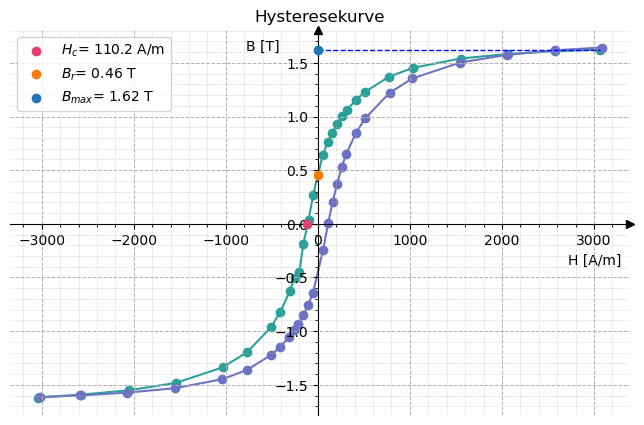





\begin{tabular}{|c|c|c|c|}
\hline
$H_{12} [A/m]$ & $B_{12} [T]$ & $H_{34} [A/m]$ & $B_{34} [T]$ \\ \hline
-3038.0 & -1.6180 & -3023.6 & -1.6150 \\ \hline
-2572.1 & -1.5920 & -2580.3 & -1.5990 \\ \hline
-2054.7 & -1.5520 & -2069.1 & -1.5730 \\ \hline
-1544.5 & -1.4830 & -1546.6 & -1.5310 \\ \hline
-1033.3 & -1.3370 & -1037.5 & -1.4470 \\ \hline
-768.0 & -1.1950 & -772.1 & -1.3630 \\ \hline
-511.1 & -0.9650 & -505.7 & -1.2210 \\ \hline
-409.3 & -0.8250 & -409.6 & -1.1470 \\ \hline
-305.9 & -0.6290 & -308.6 & -1.0510 \\ \hline
-253.2 & -0.5010 & -256.9 & -0.9910 \\ \hline
-200.0 & -0.4450 & -210.5 & -0.9310 \\ \hline
-157.8 & -0.1890 & -157.0 & -0.8500 \\ \hline
-100.8 & 0.0370 & -103.8 & -0.7550 \\ \hline
-49.7 & 0.2720 & -52.4 & -0.6410 \\ \hline
52.9 & 0.6410 & 57.5 & -0.2420 \\ \hline
106.3 & 0.7590 & 112.8 & 0.0120 \\ \hline
157.4 & 0.8500 & 160.6 & 0.2010 \\ \hline
211.4 & 0.9330 & 209.2 & 0.3720 \\ \hline
262.5 & 1.0020 & 260.4 & 0.5310 \\ \hline
314.2 & 1.0590 & 307.1 & 0.6480

In [17]:
#-----------Hysteresekurve-----------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import root_scalar
from scipy.stats import linregress
import matplotlib as mpl
#import matplotlib.font_manager as fm
#font_path = r'C:\Users\Obelix\AppData\Local\Microsoft\Windows\Fonts\cmunrm.ttf'  
#fm.fontManager.addfont(font_path)
#plt.rcParams['font.family'] = 'CMU Serif'
#plt.rcParams['axes.unicode_minus'] = False
#---------------------------------------------
mu_0=1.2566370614e-6

#-----------Kennwerte Eisenkern----------------
A_Fe=8.12e-4       #Querschnitt Eisen [m^2]
L_Fe=0.35          #Länge Umlauf [m]
#----------------------------------------------

#-----------Kennwerte Spulen-------------------
N_err=3600          #Windungen Primärspule
N_mess=600          #Windungen Sekundärspule
#----------------------------------------------

#-----------Integrator------------------------
T=185e-3       #Zeitkonstante [s]
#----------------------------------------------

#-------------Strom mA und Spannungs Messwerte V für Quadrant 1-2----------------------------------------
I_err_12=np.array([297.5 ,250.4 ,200.3 ,150.6,100.1 ,74.6 ,49.62 ,40.17 ,30.31 ,25.29 ,20.32 ,15.07 ,10.10 ,4.91,
                   -5.07 ,-10.04,-15.58 ,-19.68 ,-24.85 ,-29.98 ,-40.03 ,-49.93 ,-74.9 ,-100.7 ,-150.4 ,-200.0 ,-250.3 ,-295.6] )
U_mess_12=np.array([5.1600, 5.1200,5.0500,4.94,4.71,4.49,4.12,3.93,3.67,3.52,3.34,3.12,2.88,2.57,
                   1.5980, 0.9800,0.3840,-0.2900, -0.4380,  -0.7750, -1.2900, -1.6600,  -2.2660,-2.6400, -3.0230, -3.2040, -3.3100, -3.3800])
#-------------------------------------------------------------------------------------
#----------------------------------------------I U Quadrant 3-4---------------------------------
I_err_34=np.array([-294.2,-251.1 ,-201.4 ,-150.6 ,-101.1 ,-75.3 ,-49.4 ,-40.06 ,-30.24 ,-25.21 ,-20.70 ,-15.50 ,-10.33 ,-5.33,
                   5.35,10.73 ,15.38 ,20.10 ,25.08 ,29.62 ,40.06 ,49.67,75.60 ,99.60 ,150.0 ,199.4 ,250.0 ,299.7 ])

U_mess_34 = np.array([-3.37,-3.3300,-3.2600,-3.1500,-2.9300,-2.7080,-2.3330,-2.1390,-1.8850,-1.7280,-1.5690,-1.3570,-1.1060,-0.8060,
                      0.2460,0.9130,1.4120,1.8620,2.2810,2.5890,3.1160,3.4700,4.1000,4.4500,4.8400,5.0300,5.1400,5.2100])
#-----------------------------------------------------------------------------------

#-----------Durchflutung-------------------------
theta_12=N_err*I_err_12*1e-3 #mA in A
theta_34=N_err*I_err_34*1e-3
#print(f'Durchflutung\nTheta 12={theta_12}')
#------------------------------------------------
#-----------Feldstärke H-------------------------
H_12=theta_12/L_Fe 
H_34=theta_34/L_Fe
#print(f'Feldstärke H\n H12=\n{np.round(H_12,3)}\nH34=\n{np.round(H_34,3)}\n')
#-----------Fluss phi in Vs------------------------
phi_12=U_mess_12*T*(1/N_mess)
phi_34=U_mess_34*T*(1/N_mess)
#------------magnetisches Feld B [Vs/m^2=Tesla]----
B_12=phi_12/A_Fe
B_34=phi_34/A_Fe
#print(f'magnetisches Feld B\n B_12=\n{np.round(B_12,3)}')
#print(f'\n B_34=\n{np.round(B_34,3)}')
#-------------1. Offset Korrektur----------
B_offset = 0.5 * (B_12[np.argmin(np.abs(H_12))] + B_34[np.argmin(np.abs(H_34))])
B_12 -= B_offset
B_34 -= B_offset
#---------------Schnittpunkte für 12--------------
sort_idx = np.argsort(H_12)
H_12 = H_12[sort_idx]
B_12 = B_12[sort_idx]
indices = np.where(np.diff(np.sign(B_12)) != 0)[0]  
H_12_n0 = []
for i in indices:
    x0, x1 = H_12[i], H_12[i + 1]
    y0, y1 = B_12[i], B_12[i + 1]
    if y0 == 0 and y1 == 0:
        continue
    try:
        res = root_scalar(lambda t: np.interp(t, H_12, B_12), bracket=[x0, x1], method='brentq')
        if res.converged:
            H_12_n0.append(res.root)
    except ValueError:
        continue
H_12_n0 = np.array(H_12_n0)
if (H_12.min() <= 0 <= H_12.max()):
    B_12_nH0 = np.interp(0, H_12, B_12)
else:
    B_12_nH0 = np.nan  
#---------------Schnittpunkte für 34--------------
sort_idx = np.argsort(H_34)
H_34 = H_34[sort_idx]
B_34 = B_34[sort_idx]
indices = np.where(np.diff(np.sign(B_34)) != 0)[0]  
H_34_n0 = []
for i in indices:
    x0, x1 = H_34[i], H_34[i + 1]
    y0, y1 = B_34[i], B_34[i + 1]
    
    if y0 == y1 == 0:
        continue  
    try:
        res = root_scalar(lambda t: np.interp(t, H_34, B_34), bracket=[x0, x1], method='brentq')
        if res.converged:
            H_34_n0.append(res.root)
    except ValueError:
        continue
H_34_n0 = np.array(H_34_n0)
if (H_34.min() <= 0 <= H_34.max()):
    B_34_nH0 = np.interp(0, H_34, B_34)
else:
    B_34_nH0 = np.nan  
# offset korrektur
# Hc sortieren
Hc_12 = np.sort(H_12_n0)
Hc_34 = np.sort(H_34_n0)
# Mittelwert hc= horizontaler offset
H_offset = 0.5 * (Hc_12.mean() + Hc_34.mean())
# Offset abziehen
H_12_korrekt = H_12 - H_offset
H_34_korrekt = H_34 - H_offset
# nochmal Nullstellen 
def find_zero_crossings_sorted(H, B):
    idx = np.argsort(H); Hs, Bs = H[idx], B[idx]
    roots = []
    for i in np.where(np.diff(np.sign(Bs)) != 0)[0]:
        try:
            r = root_scalar(lambda t: np.interp(t, Hs, Bs), bracket=[Hs[i], Hs[i+1]], method='brentq')
            if r.converged: roots.append(r.root)
        except Exception:
            pass
    return np.array(roots)
Hc_12_final = find_zero_crossings_sorted(H_12_korrekt, B_12)
Hc_34_final = find_zero_crossings_sorted(H_34_korrekt, B_34)
# Remanenz auf korrigierter H-Achse
B_r_12_final = np.interp(0, H_12_korrekt, B_12)
B_r_34_final = np.interp(0, H_34_korrekt, B_34)
# Mittelwerte
Hc_mean = 0.5 * (np.mean(np.abs(Hc_12_final)) + np.mean(np.abs(Hc_34_final)))
B_r_mean = 0.5 * (np.abs(B_r_12_final) + np.abs(B_r_34_final))
print(f"\nKoerzitivfeldstärke:\t H_c={Hc_mean:.3f} A/m\nRemanenzfeld:\t\t B_r={B_r_mean:.3f} T\n")
#b(h=2500A/m) Wert
H_target = 2500  # A/m
# interpoliern
B_12_at_2500 = np.interp(H_target, H_12_korrekt, B_12)
B_34_at_2500 = np.interp(H_target, H_34_korrekt, B_34)
# Mean
B_mean_at_2500 = 0.5 * (B_12_at_2500 + B_34_at_2500)
print(f"B bei H=2500 A/m \nB Q1-2:\t\t\t {B_12_at_2500:.4f} T\nB Q3-4:\t\t\t {B_34_at_2500:.4f} T\nMittelwert B bei 2500:   {B_mean_at_2500:.4f} T")
#----------------------------------
plt.figure(figsize=(8,5))           
#-------------PLOT----------------
plt.title('Hysteresekurve')
plt.plot(H_12_korrekt, B_12,color='#2aa198',marker='o',zorder=1)
plt.plot(H_34_korrekt,B_34,color='#6c71c4',marker='o',zorder=1)
#----------------------------------
if len(H_12_n0) > 0:
    plt.scatter(H_12_n0, np.zeros_like(H_12_n0), color='#e53f71', label=f'$H_c$= {np.round(Hc_mean,1)} A/m',zorder=3)

if not np.isnan(B_12_nH0):
    plt.scatter(0, B_12_nH0, color='#f77c04', label=f'$B_r$= {np.round(B_12_nH0,2)} T',zorder=4)
plt.scatter(0,np.max(np.abs(B_12)),label=f'$B_{{max}}$= {np.round(np.max(np.abs(B_12)),2)} T',zorder=3)  
H_max=np.max(np.abs(H_12_korrekt))
B_max=np.max(np.abs(B_12))
#Gitter
plt.minorticks_on()  
plt.grid(True, which='major', linestyle='--', linewidth=0.7)  
plt.grid(True, which='minor', linestyle=':', linewidth=0.4)  
plt.plot([0,H_max], [B_max,B_max], linestyle='--', color='blue', linewidth=1)
#Achsen
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Pfeile
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# Beschriftungen an Pfeilenden
ax.set_xlabel('H [A/m]', x=0.9, ha='left')  
ax.set_ylabel('B [T]', y=0.95, rotation=0, ha='left', va='bottom')
#Verschiebung Text y
ax.yaxis.set_label_coords(0.38, 0.94)
plt.legend()
#plt.savefig(r"C:\Users\Obelix\Documents\Hysteresekurve_korrigierteroffset.pdf", dpi=500)
plt.show()
#arrays in latextabelle
print(f'\n\n\n')
def neue_latex_tabelle(H_12, B_12, H_34, B_34):
    latex_code = "\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
    latex_code += "$H_{12} [A/m]$ & $B_{12} [T]$ & $H_{34} [A/m]$ & $B_{34} [T]$ \\\\ \\hline\n"
    for h12, b12, h34, b34 in zip(H_12, B_12, H_34, B_34):
        latex_code += f"{h12} & {b12:.4f} & {h34} & {b34:.4f} \\\\ \\hline\n"
    
    latex_code += "\\end{tabular}"
    return latex_code

latex_tabelle = neue_latex_tabelle(np.round(H_12_korrekt,1), np.round(B_12,3), np.round(H_34_korrekt,1), np.round(B_34,3))
print(latex_tabelle)

print(f'\n\n\n')
def neue_latex_tabelle(H_12, B_12, H_34, B_34):
    latex_code = "\\begin{tabular}{|c|" + "c|" * len(H_12) + "}\n\\hline\n"
    
    # Erste Zeile für B_12
    latex_code += "$B_{12} [T]$ & " + " & ".join([f"{b:.4f}" for b in B_12]) + " \\\\ \\hline\n"
    
    # Zweite Zeile für H_12
    latex_code += "$H_{12} [A/m]$ & " + " & ".join([f"{h:.1f}" for h in H_12]) + " \\\\ \\hline\n"
    
    # Dritte Zeile für B_34
    latex_code += "$B_{34} [T]$ & " + " & ".join([f"{b:.4f}" for b in B_34]) + " \\\\ \\hline\n"
    
    # Vierte Zeile für H_34
    latex_code += "$H_{34} [A/m]$ & " + " & ".join([f"{h:.1f}" for h in H_34]) + " \\\\ \\hline\n"
    
    latex_code += "\\end{tabular}"
    return latex_code

latex_tabelle = neue_latex_tabelle(np.round(H_12_korrekt, 1),np.round(B_12, 3),np.round(H_34_korrekt, 1),np.round(B_34, 3))           
print(latex_tabelle)

